In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
mydata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/pima-indians-diabetes-2.csv")

In [3]:
mydata.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
183,5,73,60,0,0,26.8,0.268,27,0
364,4,147,74,25,293,34.9,0.385,30,0
73,4,129,86,20,270,35.1,0.231,23,0
471,0,137,70,38,0,33.2,0.170,22,0
756,7,137,90,41,0,32.0,0.391,39,0
322,0,124,70,20,0,27.4,0.254,36,1
520,2,68,70,32,66,25.0,0.187,25,0
248,9,124,70,33,402,35.4,0.282,34,0
732,2,174,88,37,120,44.5,0.646,24,1
11,10,168,74,0,0,38.0,0.537,34,1


In [4]:
mydata.shape

(768, 9)

In [5]:
mydata.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
mydata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
duplicate = mydata.duplicated()
duplicate.sum()


0

In [16]:
mydata["Plas"].replace(0,np.nan, inplace = True)

In [17]:
mydata["Pres"].replace(0,np.nan, inplace = True)

In [18]:
mydata["skin"].replace(0,np.nan, inplace = True)

In [19]:
mydata["mass"].replace(0,np.nan, inplace = True)

In [36]:
mydata["test"].replace(0,np.nan, inplace = True)

In [37]:
mydata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.837240,121.686763,72.375171,29.059150,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.344157,30.535641,11.973207,10.057253,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,57.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
mydata.isnull().sum()

Preg       0
Plas       5
Pres      35
skin     227
test       0
mass      11
pedi       0
age        0
class      0
dtype: int64

<AxesSubplot:>

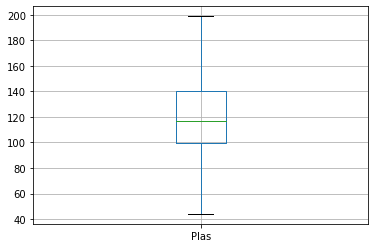

In [69]:
mydata.boxplot(column = 'Plas')

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [25]:
lowleadtime,uppleadtime = remove_outlier(mydata["Preg"])

In [26]:
mydata["Preg"]=np.where(mydata["Preg"]>uppleadtime,uppleadtime,mydata["Preg"])

In [27]:
mydata["Preg"]=np.where(mydata["Preg"]<lowleadtime,lowleadtime,mydata["Preg"])

In [30]:
lowleadtime,uppleadtime = remove_outlier(mydata["Pres"])
mydata["Pres"]=np.where(mydata["Pres"]>uppleadtime,uppleadtime,mydata["Pres"])
mydata["Pres"]=np.where(mydata["Pres"]<lowleadtime,lowleadtime,mydata["Pres"])

In [33]:
lowleadtime,uppleadtime = remove_outlier(mydata["skin"])
mydata["skin"]=np.where(mydata["skin"]>uppleadtime,uppleadtime,mydata["skin"])
mydata["skin"]=np.where(mydata["skin"]<lowleadtime,lowleadtime,mydata["skin"])

In [39]:
lowleadtime,uppleadtime = remove_outlier(mydata["test"])
mydata["test"]=np.where(mydata["test"]>uppleadtime,uppleadtime,mydata["test"])
mydata["test"]=np.where(mydata["test"]<lowleadtime,lowleadtime,mydata["test"])

In [42]:
lowleadtime,uppleadtime = remove_outlier(mydata["mass"])
mydata["mass"]=np.where(mydata["mass"]>uppleadtime,uppleadtime,mydata["mass"])
mydata["mass"]=np.where(mydata["mass"]<lowleadtime,lowleadtime,mydata["mass"])

In [45]:
lowleadtime,uppleadtime = remove_outlier(mydata["pedi"])
mydata["pedi"]=np.where(mydata["pedi"]>uppleadtime,uppleadtime,mydata["pedi"])
mydata["pedi"]=np.where(mydata["pedi"]<lowleadtime,lowleadtime,mydata["pedi"])

In [48]:
lowleadtime,uppleadtime = remove_outlier(mydata["age"])
mydata["age"]=np.where(mydata["age"]>uppleadtime,uppleadtime,mydata["age"])
mydata["age"]=np.where(mydata["age"]<lowleadtime,lowleadtime,mydata["age"])

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>,
        <AxesSubplot:title={'center':'Pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

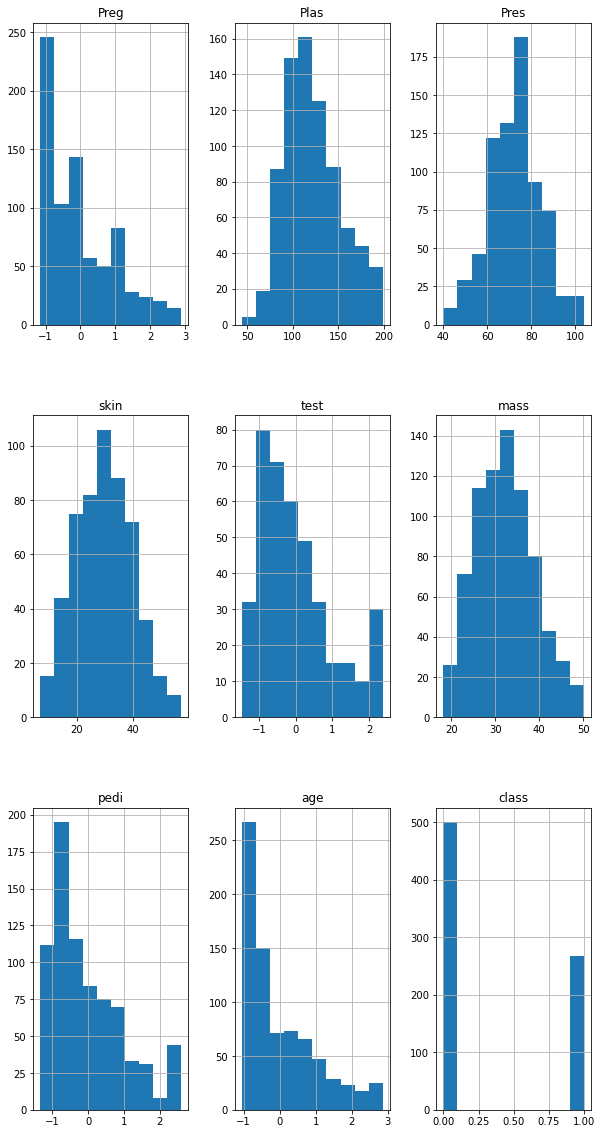

In [53]:
mydata.hist(figsize = (10,20))

In [52]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
mydata["Preg"]=std_scale.fit_transform(mydata[["Preg"]])
mydata["test"]=std_scale.fit_transform(mydata[["test"]])
mydata["pedi"]=std_scale.fit_transform(mydata[["pedi"]])
mydata["age"]=std_scale.fit_transform(mydata[["age"]])

In [58]:
mydata['Plas'].replace(np.nan, mydata["Plas"].median(), inplace = True)
mydata['Pres'].replace(np.nan, mydata["Pres"].median(), inplace = True)
mydata['skin'].replace(np.nan, mydata["skin"].median(), inplace = True)
mydata['mass'].replace(np.nan, mydata["mass"].median(), inplace = True)
mydata['test'].replace(np.nan, mydata["test"].median(), inplace = True)

In [59]:
mydata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [62]:
X = mydata.drop(['class'], axis = 1)
y = mydata[['class']]

In [70]:
import warnings 
warnings.filterwarnings('ignore')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1 )
reg_model_1 = LogisticRegression(solver = 'liblinear')
reg_model_1.fit(X_train, y_train)
reg_model_1.score(X_train, y_train)

0.7653631284916201

In [82]:
reg_model_1.score(X_test, y_test)

0.7878787878787878

In [114]:
reg_model_2 = DecisionTreeClassifier(max_depth=5, criterion='entropy')

In [115]:
reg_model_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [116]:
reg_model_2.score(X_train, y_train)

0.8324022346368715

In [117]:
reg_model_2.score(X_test, y_test)

0.8095238095238095

In [168]:
reg_model_3 = KNeighborsClassifier(n_neighbors=21)

In [169]:
reg_model_3.fit(X_train, y_train)
reg_model_3.score(X_train, y_train)


0.7597765363128491

In [170]:
reg_model_3.score(X_test, y_test)

0.7705627705627706

In [192]:
model_4 = SVC(kernel = "poly", C = 2.0)

In [193]:
model_4.fit(X_train, y_train)
model_4.score(X_train, y_train)

0.7579143389199255

In [194]:
model_4.score(X_test, y_test)

0.7662337662337663

In [234]:
model_5 = BaggingClassifier(n_estimators = 15, base_estimator = reg_model_2)

In [235]:
model_5.fit(X_train, y_train)
model_5.score(X_train, y_train)

0.8547486033519553

In [236]:
model_5.score(X_test, y_test)

0.8051948051948052

In [283]:
model_6 = AdaBoostClassifier(n_estimators=50, learning_rate=2)

In [284]:
model_6.fit(X_train, y_train)
model_6.score(X_train, y_train)

0.7299813780260708

In [285]:
model_6.score(X_test, y_test)

0.7532467532467533

In [290]:
from sklearn import metrics

<AxesSubplot:>

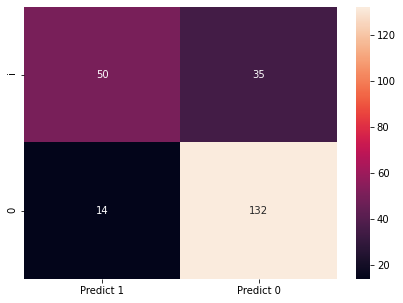

In [292]:
cm = metrics.confusion_matrix(y_test, predictions, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["i","0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')